<a href="https://colab.research.google.com/github/varshithreddy07/statml-b40/blob/main/Statml_assign_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

data = pd.read_csv('breast_cancer_survival.csv')

features = data.drop(columns=['Patient_Status'])
target = data['Patient_Status']

print("Features:")
print(features.head())

print("\nTarget Variable:")
print(target.head())


Features:
   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit  
0       20-May-18          26-Aug-18 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

le = LabelEncoder()
target_encoded = le.fit_transform(target)

features_encoded = pd.get_dummies(features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

print(f"SVM Accuracy: {svm_accuracy*100:.2f}")
print(f"KNN Accuracy: {knn_accuracy*100:.2f}")
print(f"Logistic Regression Accuracy: {logreg_accuracy*100:.2f}")


SVM Accuracy: 77.61
KNN Accuracy: 10.45
Logistic Regression Accuracy: 71.64


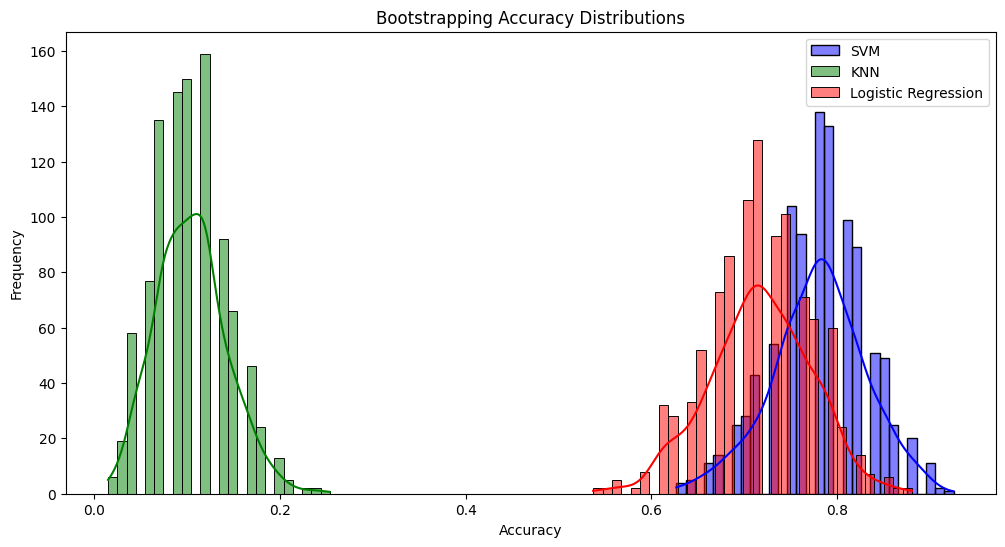

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def bootstrap_accuracy(model, X_test, y_test, n_iterations=1000):
    accuracies = []
    n_samples = len(y_test)
    for _ in range(n_iterations):
        indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
        X_sample, y_sample = X_test[indices], y_test[indices]
        y_pred = model.predict(X_sample)
        accuracies.append(accuracy_score(y_sample, y_pred))
    return accuracies

svm_bootstrap = bootstrap_accuracy(svm_model, X_test, y_test)
knn_bootstrap = bootstrap_accuracy(knn_model, X_test, y_test)
logreg_bootstrap = bootstrap_accuracy(logreg_model, X_test, y_test)

plt.figure(figsize=(12, 6))

sns.histplot(svm_bootstrap, kde=True, color='blue', label='SVM', binwidth=0.01)
sns.histplot(knn_bootstrap, kde=True, color='green', label='KNN', binwidth=0.01)
sns.histplot(logreg_bootstrap, kde=True, color='red', label='Logistic Regression', binwidth=0.01)

plt.title('Bootstrapping Accuracy Distributions')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()
